In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
import os

In [2]:
os.listdir('prep')

['weather.ipynb',
 'stage.csv',
 'population.csv',
 'micro_dust_sample.ipynb',
 '미세먼지201901.csv',
 'micro_dust.ipynb',
 '.ipynb_checkpoints',
 'data',
 'population_proportion.csv',
 '인구가중합미세먼지.csv',
 'Merge.ipynb']

In [3]:
os.listdir('prep/data')

['new_ratings_with_real.csv',
 'population.csv',
 'weather.csv',
 'new_performance.csv',
 'performance_prime.csv',
 'new_rating.xlsx',
 'new_performance_ver3.csv',
 'new_performance_ver2.csv',
 'new_performance_ver4.csv',
 '미세먼지',
 '지역별가중합날씨.csv',
 '월별인구가중합날씨.csv',
 '시청률.xlsx',
 'weather2020.csv']

In [4]:
def drop_unnamed(data):
    names = data.columns
    for name in names:
        if "Unnamed" in name:
            data.pop(name)
    return data

## 실적데이터 분석

1. 미세먼지 데이터 영향요인 분석(안함)
2. stage.csv : 방송 초반/중반/후반에 따른 실적 변동 경향성 분석


In [5]:
pf = pd.read_csv("prep/data/performance_prime.csv")
pf = drop_unnamed(pf)
pf.head(2)

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,date,week,time,hour,prime
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,2019-01-01 00:00:00,1,06:00:00,6,0
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,2019-01-01 00:00:00,1,06:00:00,6,0


In [6]:
pf.hour.unique()

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23,  0,  1,  2])

In [7]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35379 entries, 0 to 35378
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   방송일시    35379 non-null  object 
 1   노출(분)   35379 non-null  float64
 2   마더코드    35379 non-null  int64  
 3   상품코드    35379 non-null  int64  
 4   상품명     35379 non-null  object 
 5   상품군     35379 non-null  object 
 6   판매단가    35379 non-null  int64  
 7   취급액     35379 non-null  float64
 8   date    35379 non-null  object 
 9   week    35379 non-null  int64  
 10  time    35379 non-null  object 
 11  hour    35379 non-null  int64  
 12  prime   35379 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 3.5+ MB


In [8]:
stage = pd.read_csv("prep/stage.csv")
stage.head()

,방송일시,date,상품코드,노출(분),stage
0,2019-01-01 06:00:00,2019-01-01,201072.0,20.0,early
1,2019-01-01 06:20:00,2019-01-01,201072.0,20.0,mid
2,2019-01-01 06:40:00,2019-01-01,201072.0,20.0,late
3,2019-01-01 06:00:00,2019-01-01,201079.0,20.0,early
4,2019-01-01 06:20:00,2019-01-01,201079.0,20.0,mid


### 실적데이터 & stage

In [11]:
del stage['date']
del stage['노출(분)']
df = pf.merge(stage, on = ['방송일시', '상품코드'])
df.head()

,방송일시,노출(분),마더코드,상품코드,상품명,상품군,판매단가,취급액,date,week,time,hour,prime,stage
0,2019-01-01 06:00:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,2099000.0,2019-01-01 00:00:00,1,06:00:00,6,0,early
1,2019-01-01 06:00:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,4371000.0,2019-01-01 00:00:00,1,06:00:00,6,0,early
2,2019-01-01 06:20:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,3262000.0,2019-01-01 00:00:00,1,06:20:00,6,0,mid
3,2019-01-01 06:20:00,20.0,100346,201079,테이트 여성 셀린니트3종,의류,39900,6955000.0,2019-01-01 00:00:00,1,06:20:00,6,0,mid
4,2019-01-01 06:40:00,20.0,100346,201072,테이트 남성 셀린니트3종,의류,39900,6672000.0,2019-01-01 00:00:00,1,06:40:00,6,0,late


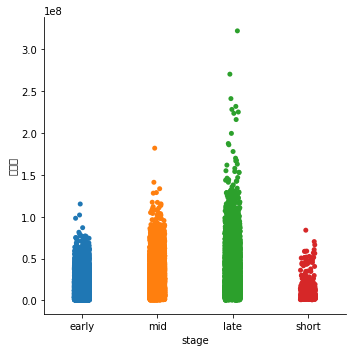

In [17]:
import seaborn as sns
sns.catplot(x = "stage", y = "취급액", 
            data = df)